In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('loan_train.csv')
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [3]:
dataset['due_date']=pd.to_datetime(dataset['due_date'])
dataset['effective_date']=pd.to_datetime(dataset['effective_date'])

In [4]:
dataset=dataset.iloc[:,2:]
dataset

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [5]:
dataset.isnull().any()

loan_status       False
Principal         False
terms             False
effective_date    False
due_date          False
age               False
education         False
Gender            False
dtype: bool

In [6]:
dataset.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [7]:
dataset['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [8]:
dataset['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

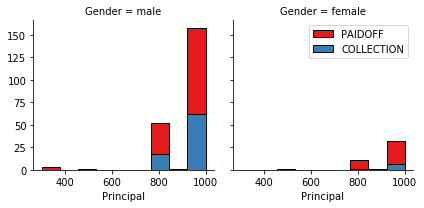

In [9]:
import seaborn as sns

bins = np.linspace(dataset.Principal.min(), dataset.Principal.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

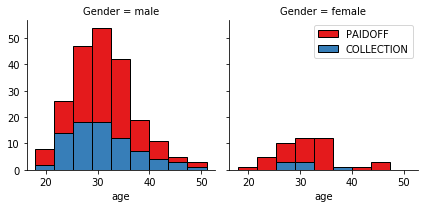

In [10]:
bins = np.linspace(dataset.age.min(), dataset.age.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [11]:
dataset['deadline']=dataset['due_date']-dataset['effective_date']

dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,deadline
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29 days


In [12]:
dataset['deadline']=dataset['deadline'].dt.days
dataset.head(3)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,deadline
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14


In [13]:
dataset=dataset[['loan_status','Principal','terms','age','education','Gender','deadline']]
dataset

,loan_status,Principal,terms,age,education,Gender,deadline
0,PAIDOFF,1000,30,45,High School or Below,male,29
1,PAIDOFF,1000,30,33,Bechalor,female,29
2,PAIDOFF,1000,15,27,college,male,14
3,PAIDOFF,1000,30,28,college,female,29
4,PAIDOFF,1000,30,29,college,male,29
...,...,...,...,...,...,...,...
341,COLLECTION,800,15,32,High School or Below,male,14
342,COLLECTION,1000,30,25,High School or Below,male,29
343,COLLECTION,800,15,39,college,male,14
344,COLLECTION,1000,30,28,college,male,59


In [14]:
dataset[dataset['education']=='Master or Above'].index.tolist()

[50, 293]

In [15]:
# dataset=dataset.drop([50,293])
# dataset

In [16]:
# Q1=dataset.quantile(0.25)
# Q3=dataset.quantile(0.75)
# IQR=Q3-Q1
# IQR

In [17]:
# dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
# dataset

In [18]:
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [19]:
x

array([[1000, 30, 45, 'High School or Below', 'male', 29],
       [1000, 30, 33, 'Bechalor', 'female', 29],
       [1000, 15, 27, 'college', 'male', 14],
       ...,
       [800, 15, 39, 'college', 'male', 14],
       [1000, 30, 28, 'college', 'male', 59],
       [1000, 30, 26, 'college', 'male', 29]], dtype=object)

In [20]:
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [22]:
x[0]

array([1000, 30, 45, 'High School or Below', 'male', 29], dtype=object)

In [23]:
x.shape

(346, 6)

In [24]:
ct=ColumnTransformer([('on',OneHotEncoder(),[3])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 45, 'male', 29],
       [1.0, 0.0, 0.0, ..., 33, 'female', 29],
       [0.0, 0.0, 0.0, ..., 27, 'male', 14],
       ...,
       [0.0, 0.0, 0.0, ..., 39, 'male', 14],
       [0.0, 0.0, 0.0, ..., 28, 'male', 59],
       [0.0, 0.0, 0.0, ..., 26, 'male', 29]], dtype=object)

In [25]:
x.shape

(346, 9)

In [26]:
x=x[:,1:]
x

array([[1.0, 0.0, 0.0, ..., 45, 'male', 29],
       [0.0, 0.0, 0.0, ..., 33, 'female', 29],
       [0.0, 0.0, 1.0, ..., 27, 'male', 14],
       ...,
       [0.0, 0.0, 1.0, ..., 39, 'male', 14],
       [0.0, 0.0, 1.0, ..., 28, 'male', 59],
       [0.0, 0.0, 1.0, ..., 26, 'male', 29]], dtype=object)

In [27]:
x.shape

(346, 8)

In [28]:
x[0]

array([1.0, 0.0, 0.0, 1000, 30, 45, 'male', 29], dtype=object)

In [29]:
ct=ColumnTransformer([('on',OneHotEncoder(),[6])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 1.0, ..., 30, 45, 29],
       [1.0, 0.0, 0.0, ..., 30, 33, 29],
       [0.0, 1.0, 0.0, ..., 15, 27, 14],
       ...,
       [0.0, 1.0, 0.0, ..., 15, 39, 14],
       [0.0, 1.0, 0.0, ..., 30, 28, 59],
       [0.0, 1.0, 0.0, ..., 30, 26, 29]], dtype=object)

In [30]:
x.shape

(346, 9)

In [31]:
lb=LabelEncoder()
y=lb.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
# normalizing using standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [34]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=0)

In [36]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [37]:
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5285714285714286

C:\Users\sarath\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


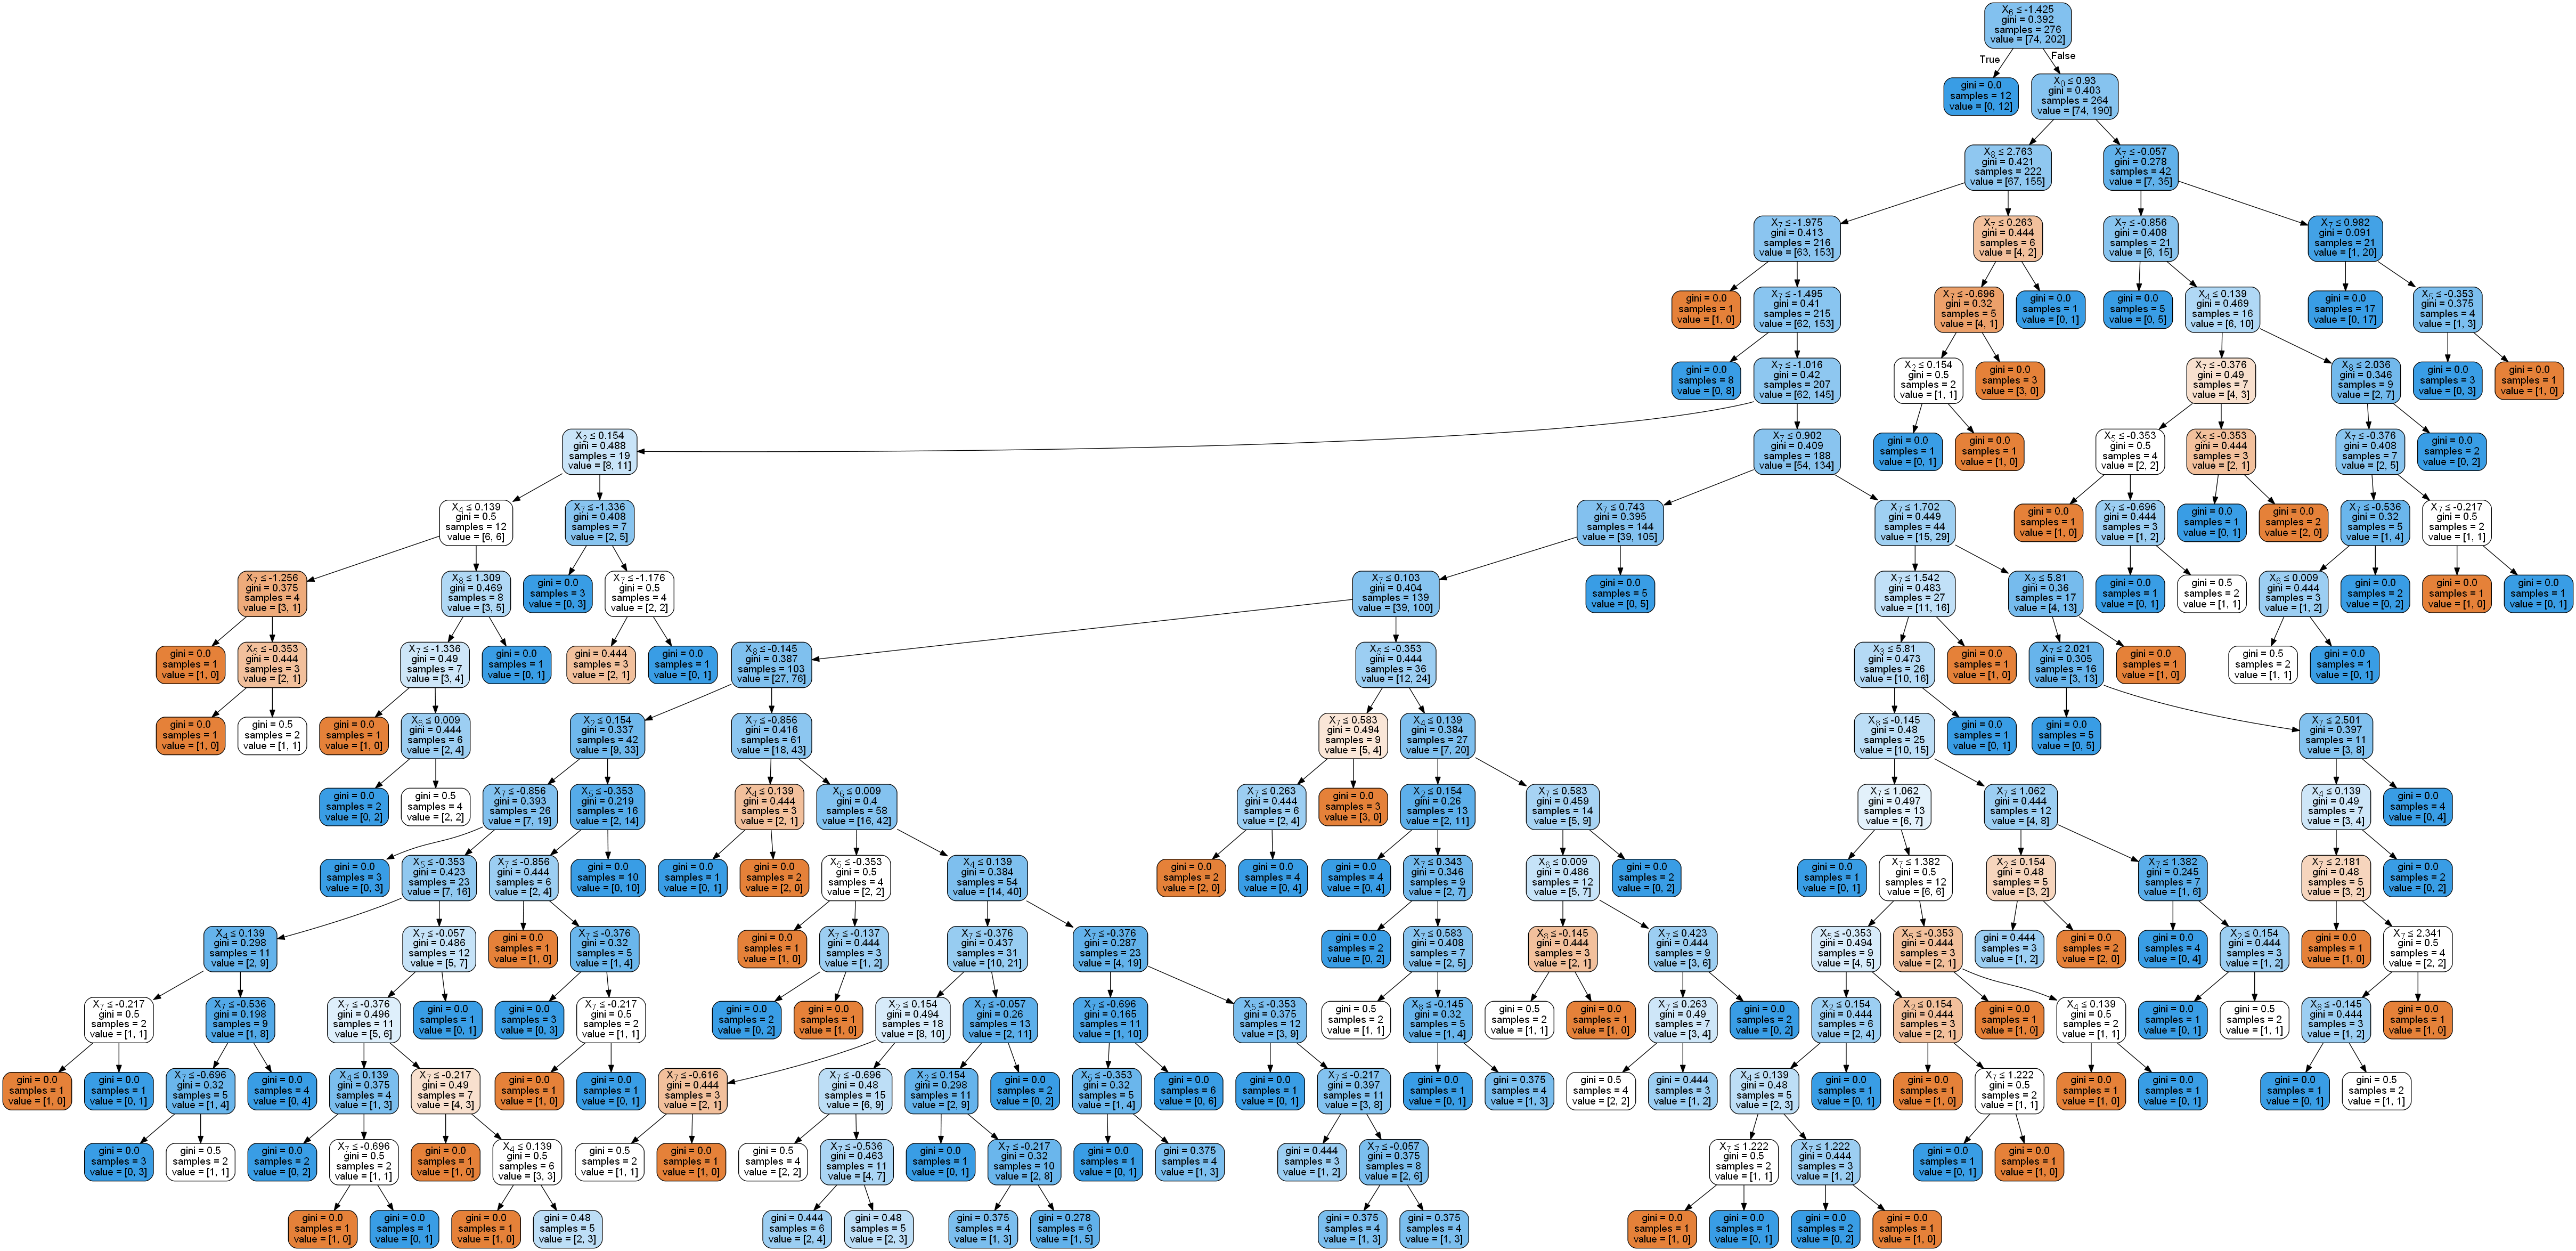

In [39]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7714285714285715

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8285714285714286

In [47]:
from sklearn.naive_bayes import GaussianNB
navie=GaussianNB()

In [48]:
navie.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred=navie.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8285714285714286

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [52]:
pipe=Pipeline([('sc',StandardScaler()),('rf',RandomForestClassifier(n_estimators=10,random_state=0))])

In [53]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [54]:
y_pred=pipe.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6428571428571429

In [56]:
#y_train=y_train.astype(float)
#y_test=y_test.astype(float)

In [57]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=0)
clf_svm.fit(x_train, y_train)  

y_pred=clf_svm.predict(x_test)

C:\Users\sarath\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8285714285714286